# Lab 5 - Data Visualization

In [61]:
import pandas as pd
import matplotlib.pyplot as plt

## NFL Offense Data

In [62]:
# import csv
df3 = pd.read_csv("nfloffenseweek3.csv")
df4 = pd.read_csv("nfloffenseweek4.csv")
df5 = pd.read_csv("nfloffenseweek5.csv")
df_teams = pd.read_csv("nfl_teams.csv")

1. Import the NFL week 3, 4, and 5 data and add a week column to dataset and set the value to 3, 4, or 5 for all rows from that week. Combine the weekly dataframes by adding the dataframes together row-wise. Also merge the nfl_teams.csv data to this dataframe so that the division and conference info is included.

In [63]:
df3.insert(loc=2,column='week',value=3)
df4.insert(loc=2, column='week',value=4)
df5.insert(loc=2,column='week',value=5)

week_files = [df3, df4, df5]
df = pd.concat(week_files,axis=1)
df



,rank,Name,week,games,points_scored,total_yards,offensive_plays,yards_per_play,turnovers_lost,fumbles_lost,...,rushing_yards,rushing_touchdowns,rushing_yards_per_attempt,rushing_1st_downs,penalties,penalty_yards,1st_down_penalties,percentage_scoring_drives,percentage_turnover_drives,expected_points
0,1,Baltimore Ravens,3,3,99,1141,166,6.9,3,1,...,571,4,4.5,30,24,228,14,50.0,5.8,72.06
1,2,Detroit Lions,3,3,95,1227,203,6.0,2,0,...,582,3,5.1,33,29,195,9,47.2,17.0,70.22
2,3,Buffalo Bills,3,3,91,1324,213,6.2,5,3,...,757,7,5.4,32,30,270,9,37.9,10.3,31.13
3,4,Kansas City Chiefs,3,3,88,1122,180,6.2,3,2,...,723,3,5.4,44,23,162,9,43.6,10.9,36.86
4,5,Philadelphia Eagles,3,3,86,1341,208,6.4,1,0,...,800,12,4.3,52,29,223,9,40.7,3.7,55.51
5,6,Cleveland Browns,3,3,85,1136,210,5.4,1,0,...,962,10,5.3,57,32,249,8,45.1,7.8,57.31
6,7,Jacksonville Jaguars,3,3,84,1127,204,5.5,1,0,...,610,4,5.5,30,44,391,11,44.7,10.6,47.51
7,8,Miami Dolphins,3,3,83,1066,167,6.4,2,0,...,607,3,5.3,35,34,247,8,53.1,10.2,34.91
8,9,Atlanta Falcons,3,3,80,1063,181,5.9,7,4,...,496,4,3.9,26,25,178,9,40.0,5.5,33.03
9,10,Cincinnati Bengals,3,3,64,1016,227,4.5,6,2,...,823,7,5.1,46,22,169,14,40.4,15.4,34.67


In [64]:
nfl_team = pd.merge(df,df_teams, on="Name")
nfl_team

,rank,Name,week,games,points_scored,total_yards,offensive_plays,yards_per_play,turnovers_lost,fumbles_lost,...,penalties,penalty_yards,1st_down_penalties,percentage_scoring_drives,percentage_turnover_drives,expected_points,ID,Abbreviation,Conference,Division
0,1,Baltimore Ravens,3,3,99,1141,166,6.9,3,1,...,24,228,14,50.0,5.8,72.06,3,BAL,AFC,North
1,2,Detroit Lions,3,3,95,1227,203,6.0,2,0,...,29,195,9,47.2,17.0,70.22,11,DET,NFC,North
2,3,Buffalo Bills,3,3,91,1324,213,6.2,5,3,...,30,270,9,37.9,10.3,31.13,4,BUF,AFC,East
3,4,Kansas City Chiefs,3,3,88,1122,180,6.2,3,2,...,23,162,9,43.6,10.9,36.86,16,KC,AFC,West
4,5,Philadelphia Eagles,3,3,86,1341,208,6.4,1,0,...,29,223,9,40.7,3.7,55.51,24,PHI,NFC,East
5,6,Cleveland Browns,3,3,85,1136,210,5.4,1,0,...,32,249,8,45.1,7.8,57.31,8,CLE,AFC,North
6,7,Jacksonville Jaguars,3,3,84,1127,204,5.5,1,0,...,44,391,11,44.7,10.6,47.51,15,JAX,AFC,South
7,8,Miami Dolphins,3,3,83,1066,167,6.4,2,0,...,34,247,8,53.1,10.2,34.91,17,MIA,AFC,East
8,9,Atlanta Falcons,3,3,80,1063,181,5.9,7,4,...,25,178,9,40.0,5.5,33.03,2,ATL,NFC,South
9,10,Cincinnati Bengals,3,3,64,1016,227,4.5,6,2,...,22,169,14,40.4,15.4,34.67,7,CIN,AFC,North


In [65]:
nfl_team.columns

Index(['rank', 'Name', 'week', 'games', 'points_scored', 'total_yards',
       'offensive_plays', 'yards_per_play', 'turnovers_lost', 'fumbles_lost',
       'first_downs', 'passes_completed', 'passes_attempted', 'passing_yards',
       'passing_touchdowns', 'passing_interceptions',
       'net_yards_per_pass_attempt', 'passing_1st_downs', 'rushing_attempts',
       'rushing_yards', 'rushing_touchdowns', 'rushing_yards_per_attempt',
       'rushing_1st_downs', 'penalties', 'penalty_yards', '1st_down_penalties',
       'percentage_scoring_drives', 'percentage_turnover_drives',
       'expected_points', 'rank', 'team', 'week', 'games', 'points_scored',
       'total_yards', 'offensive_plays', 'yards_per_play', 'turnovers_lost',
       'fumbles_lost', 'first_downs', 'passes_completed', 'passes_attempted',
       'passing_yards', 'passing_touchdowns', 'passing_interceptions',
       'net_yards_per_pass_attempt', 'passing_1st_downs', 'rushing_attempts',
       'rushing_yards', 'rushing_touch

2. Plot the average number of points scored each week for each team on a horizontal bar chart (with teams on the vertical axis and points on the horizontal axis). Add the points scored for each bar. (Hint: check out `plt.bar_label()`)

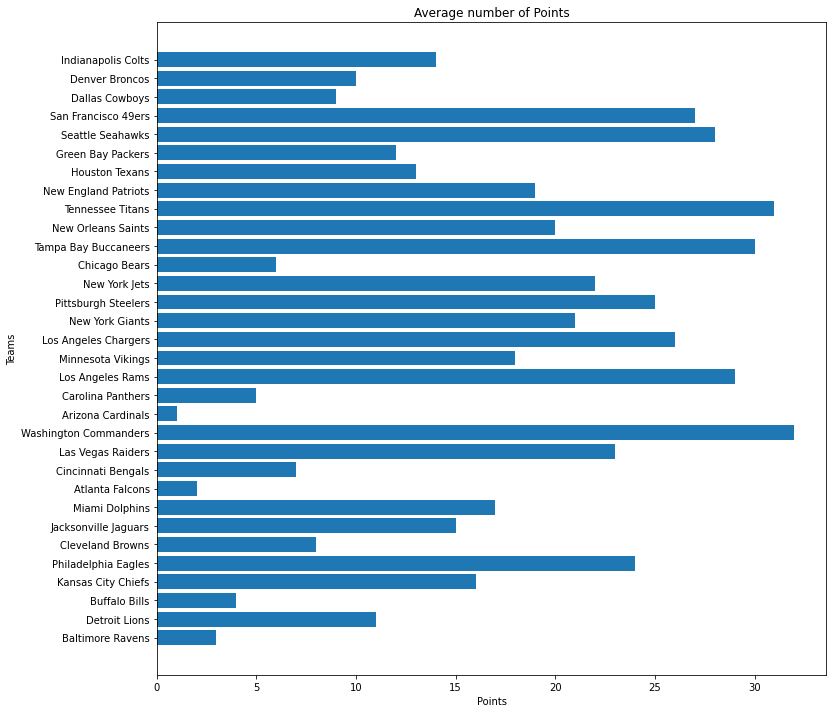

In [147]:
plt.figure(figsize=(12, 12))

#avg_num = nfl_team.groupby("Name", "Week").points_scored.mean()
#avg_num
plt.barh(nfl_team.Name, nfl_team.ID)
plt.title("Average number of Points")
plt.xlabel("Points")
plt.ylabel("Teams")
plt.show()
#fig, ax = plt.subplots()
#barhplot = plt.barh(nfl_team.Name, nfl_team.points_scored)
#plt.bar_label(barhplot, labels = "size")
#barhplot

3. Plot the average passing yards and average rushing yards for each team as a stacked bar chart.

ValueError: shape mismatch: objects cannot be broadcast to a single shape

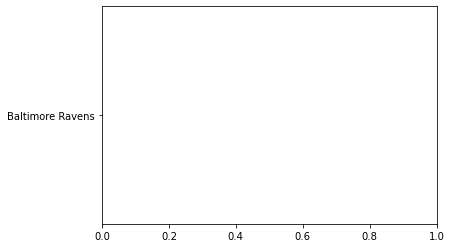

In [148]:

avg_pass = nfl_team.passing_yards.mean()
avg_pass

avg_rush = nfl_team.rushing_yards.mean()
avg_rush

plt.bar(avg_pass, nfl_team.Name, color="blue")
plt.bar(avg_rush, nfl_team.Name, bottom=avg_rush, color="green")
plt.title("Average Passing and rushing yards")
#plt.xlabel("Teams")
#plt.ylabel("# of yards")
plt.show()
#bar = rush.plot.bar(x='Name', stacked=True, color=['Blue', 'Red'], figsize=(8,6))
#bar.set_title('The average passing and rushing yards', fontsize=18)
#bar.set_ylim(0, 600)
#bar.set_xticklabels([nfl_team.Name], rotation=0)

4. Plot the average total yards vs average first downs for each team on a scatter plot (with first downs on the x axis and total yards on the y axis).

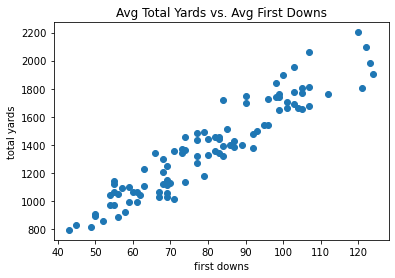

In [92]:
yards = nfl_team.groupby("Name").total_yards.mean()
yards
first_down = nfl_team.groupby("Name").first_downs.mean()
first_down
plt.scatter(first_down, yards)
plt.title("Avg Total Yards vs. Avg First Downs")
plt.xlabel("first downs")
plt.ylabel("total yards")
plt.show()

5. Plot the penalty yards for the Balitmore Ravens and the LA Rams for each week as a line chart (with week on the x-axis and penalty yards on the y-axis).

In [121]:
#pen_yar = nfl_team[(nfl_team.Name == "Balitmore Ravens") & (nfl_team.Name == "LA Rams")]
#pen_yar.penalty_yards.sum()

nfl_team.set_index(['name']).plot()


KeyError: "None of ['name'] are in the columns"

6. Plot the average total points vs average yards per play for each team as a scatter plot (with total points on the y-axis and yards per play on the x-axis).

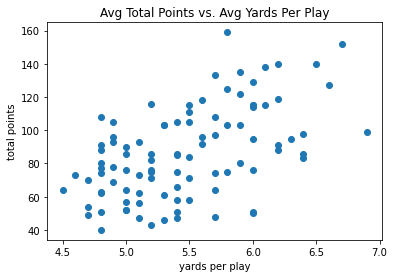

In [94]:
avg_yar = nfl_team.groupby("Name").yards_per_play.mean()
avg_yar
tot_pt = nfl_team.groupby("Name").points_scored.mean()
tot_pt
plt.scatter(avg_yar, tot_pt)
plt.title("Avg Total Points vs. Avg Yards Per Play")
plt.xlabel("yards per play")
plt.ylabel("total points")
plt.show()

7. Plot the number of penalty yards for each team in the NFC West for each week on bar chart.

ValueError: shape mismatch: objects cannot be broadcast to a single shape

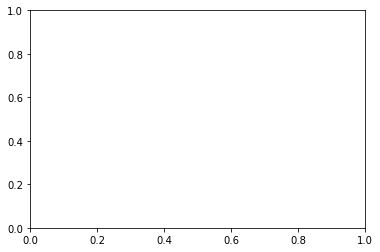

In [117]:
mask = (
    (nfl_team.Conference == "NFC") & 
    (nfl_team.Division == "West")
)
mask
score = nfl_team[mask].penalty_yards.sum()
score

plt.bar(score, mask)
plt.title("Average number of Points")
plt.show()
#we = nfl_team.week
#we
#plt.bar(nfl_team.week, score)
#plt.title("Penalty Yards")
#plt.xlabel("")
#plt.ylabel("")
#plt.show()

8. Plot the average number of weekly points per (conference and division) on a horizontal bar chart. (There will be 8 bars.)

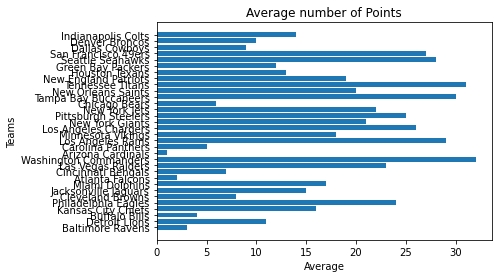

In [118]:
plt.barh(nfl_team.Name, nfl_team.ID)
plt.title("Average number of Points")
plt.xlabel("Average")
plt.ylabel("Teams")
plt.show()